<a href="https://colab.research.google.com/github/brenoslivio/CompVis_ICMC/blob/main/Pratica_02/Pratica_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula prática 02 - Visualização de dados

**SCC0252/5836 - Visualização Computacional (2022/2)**

Monitor:    Breno Lívio Silva de Almeida, brenoslivio@usp.br

Docente:    Maria Cristina Ferreira de Oliveira, cristina@icmc.usp.br

Material base de Eric Macedo Cabral.

[Repositório no GitHub](https://github.com/brenoslivio/CompVis_ICMC).

---

## Motivação

- A visualização de dados no formato tabular pode exigir muito esforço

    - Falhas de atenção

    - Sobrecarga de informação

- Capacidade cognitiva do ser humano

    - "O sistema visual humano tem um canal amplo para os nossos cérebros" [1]

- Informações são perdidas durante o processo de sumarização estatística [1]

[1] Munzner, T. (2014). Visualization Analysis and Design. A K Peters/CRC Press

### Princípios de Gestalt

- Analistas de dados podem usar estratégias como Princípios de Gestalt para levar em conta a percepção que o usuário pode ter em relação a um design de uma visualização de dados

    - Os princípios Gestalt são um importante conjunto de ideias para qualquer designer aprender e sua implementação pode melhorar muito a estética de um projeto, bem como sua funcionalidade e facilidade de uso.

    - Da mesma forma, a visualização de dados deve levar em conta um design intutivo e fácil de entender.

[Exploring the Gestalt Principles of Design](https://www.toptal.com/designers/ui/gestalt-principles-of-design)

![](https://public-media.interaction-design.org/images/uploads/c71f20c004d15f38df99ef44697ed7d5.jpg)

Fonte da imagem: [Interaction Design Foundation](https://www.interaction-design.org/literature/topics/gestalt-principles)

### Além da síntese estatística

Como já disse [Alberto Cairo](https://en.wikipedia.org/wiki/Alberto_Cairo), "nunca confie somente na síntese estatística; sempre visualize seus dados". Muitas vezes medidas encontradas como média e desvio padrão têm valores equivalentes em diferentes conjuntos de dados, nos levando a crer na possibilidade de termos dados similares. Entretanto, ao investigarmos esses por meio do uso de diferentes visualizações chegamos na conclusão que a distribuição dos dados, por exemplo, é totalmente diferente.


Obs.: Note que **síntese estatística** se refere a medidas estatísticas como média, dispersão e relacionados no contexto da estatística descritiva.

Um exemplo clássico sobre não confiar apenas na síntese estatística são os conjuntos de dados representados pelo **Quarteto de Anscombe**. Eles foram construídos em 1973 pelo estatístico Francis Anscombe para demonstrar tanto a importância dos dados gráficos ao analisá-los, quanto o efeito dos *outliers* e outras observações influentes sobre as propriedades estatísticas.

Visualmente para eles, temos o seguinte:

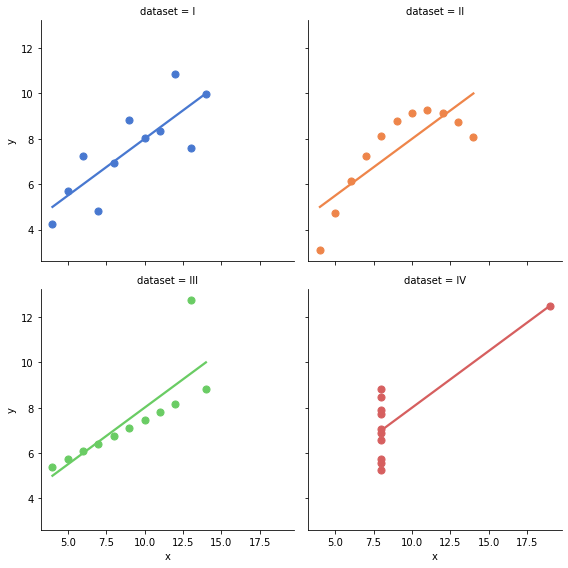

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if not IN_COLAB:
  plotly.offline.init_notebook_mode(connected=True)

anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
            col_wrap=2, ci=None, palette="muted", height=4,
            scatter_kws={"s": 50, "alpha": 1});

Podemos que ver que algumas medidas são idênticas, mesmo que a distribuição dos dados seja diferente.

In [2]:
anscombe.groupby('dataset').agg(['mean', 'std', 'sum']).T

dataset          I         II        III         IV
x mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  sum    99.000000  99.000000  99.000000  99.000000
y mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  sum    82.510000  82.510000  82.500000  82.510000

Além do Quarteto de Anscombe, outro exemplo mais recente é o [Datasaurus Dozen](https://www.autodesk.com/research/publications/same-stats-different-graphs) elaborado pelo Alberto Cairo.

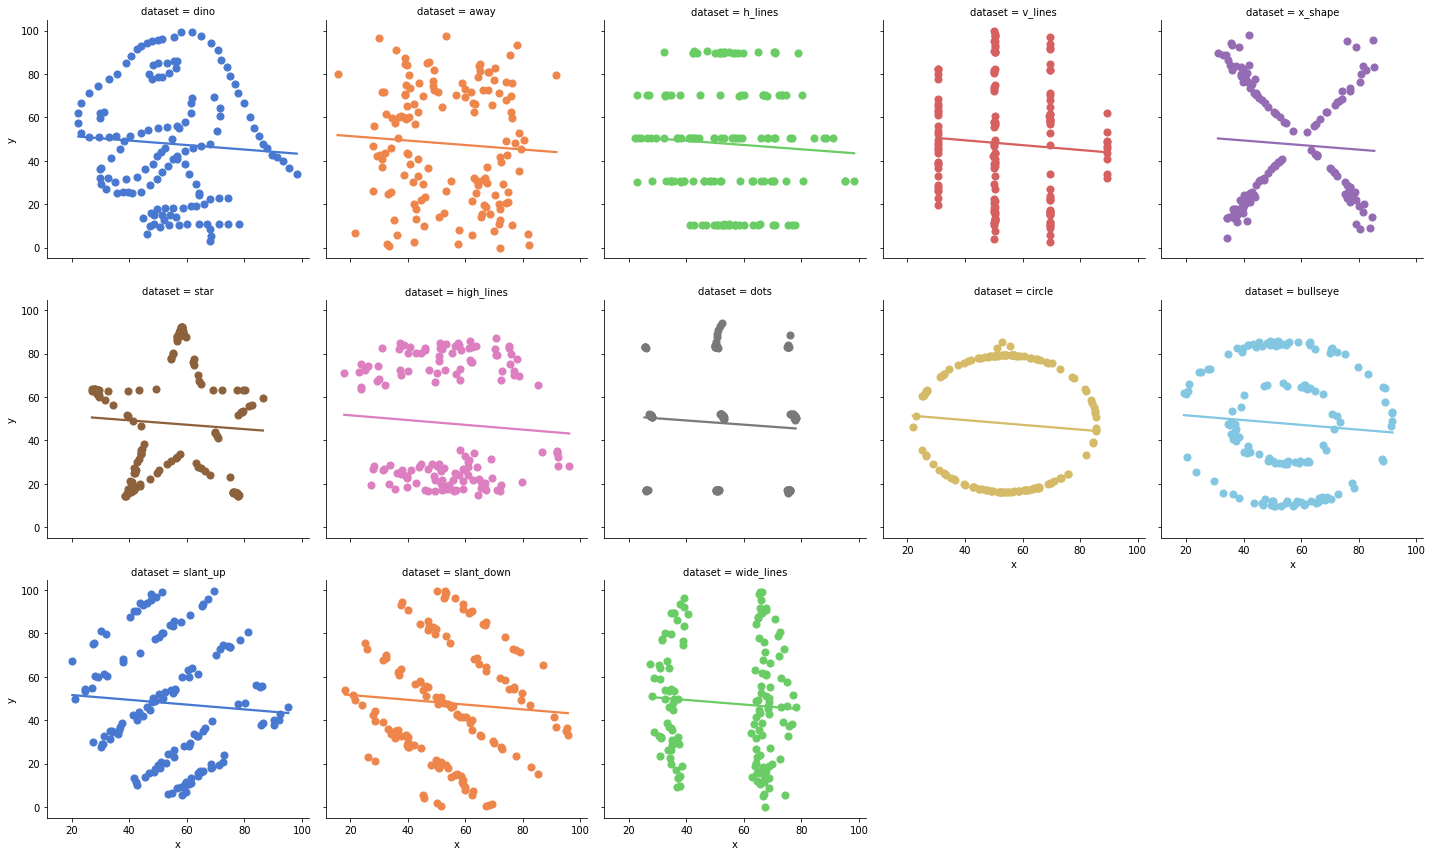

In [3]:
datasaurus = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/CompVis_ICMC/main/Pratica_02/data/DatasaurusDozen.tsv', sep='\t')

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=datasaurus,
           col_wrap=5, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

Novamente temos medidas estatísticas praticamente idênticas ainda que a distribuição dos dados seja visualmente diferente.

In [4]:
datasaurus.groupby('dataset').agg(['mean', 'std', 'sum']).T

dataset         away     bullseye       circle         dino         dots  \
x mean     54.266100    54.268730    54.267320    54.263273    54.260303   
  std      16.769825    16.769239    16.760013    16.765142    16.767735   
  sum    7705.786169  7706.159663  7705.959398  7705.384800  7704.963090   
y mean     47.834721    47.830823    47.837717    47.832253    47.839829   
  std      26.939743    26.935727    26.930036    26.935403    26.930192   
  sum    6792.530329  6791.976888  6792.955852  6792.179900  6793.255748   

dataset      h_lines   high_lines   slant_down     slant_up         star  \
x mean     54.261442    54.268805    54.267849    54.265882    54.267341   
  std      16.765898    16.766704    16.766759    16.768853    16.768959   
  sum    7705.124733  7706.170350  7706.034533  7705.755214  7705.962437   
y mean     47.830252    47.835450    47.835896    47.831496    47.839545   
  std      26.939876    26.939998    26.936105    26.938608    26.930275   
  sum    6791.895772  6792.633929  6792.697279  6792.072383  6793.215422   

dataset      v_lines   wide_lines      x_shape  
x mean     54.269927    54.266916    54.260150  
  std      16.769959    16.770000    16.769958  
  sum    7706.329667  7705.902115  7704.941347  
y mean     47.836988    47.831602    47.839717  
  std      26.937684    26.937902    26.930002  
  sum    6792.852294  6792.087482  6793.239854

### Dicas gerais

A área de visualização de dados pode ser bem complexa no contexto de gerar visualizações razoavelmente fidedignas baseadas em nossos dados. 

Há diversas fontes de conhecimento para aperfeiçoar em como e quando usar as visualizações que vamos discutir:

Livros como *How Charts Lie: Getting Smarter about Visual Information* do Alberto Cairo

[Friends Don't Let Friends Make Bad Graphs](https://github.com/cxli233/FriendsDontLetFriends)

[9 Easy Steps To Make Great Charts](https://towardsdatascience.com/9-easy-steps-to-make-great-charts-33e2c4612e39)

### Bibliotecas

Para essa aula prática iremos trabalhar com as bibliotecas Matplotlib, Seaborn, Plotly, Altair, Wordcloud e Networkx, que já constam na lista de bibliotecas do ambiente Conda a ser criado no repositório do GitHub.

## Distribuição

### Histograma

- Distribuição de **dados numéricos**

- Bins

    - É interessante verificar o número mais adequado de bins

- Não é o mesmo que um gráfico de barras

Histogramas no From data to Viz: https://www.data-to-viz.com/graph/histogram.html

Documentação do Plotly: https://plotly.com/python/histograms/

Vamos gerar um histograma considerando o dataset `tips`:

In [5]:
import plotly.express as px
import plotly.io as pio

tips = px.data.tips()

hist = px.histogram(tips, x="total_bill", nbins = 30)
hist.show()

### Boxplot

- Representação estatística de variáveis através de seus quartis

    - [IQR](https://en.wikipedia.org/wiki/Interquartile_range)

- Não representa quantidade de observações

- Outliers

- Algumas desvatangens são:

    - Sumarização implica em perda de informação

    - Plotar os pontos de dados pode gerar *overplotting*

    - Podemos lidar com alguns problemas usando o Violin plot

Boxplot no From data to Viz: https://www.data-to-viz.com/caveat/boxplot.html

Documentação do Plotly: https://plotly.com/python/box-plots/

Vamos gerar um boxplot com outliers e outro com gráfico de dispersão sem outliers para o dataset `tips`:

In [6]:
box_1 = px.box(tips,
    y="total_bill", title="Box plot com outliers")
box_1.show()

box_2 = px.box(tips,
    y="total_bill", points="all",
    title="Box plot com gráfico de dispersão (sem outliers)")
box_2.show()

### Violin plot

- Representação estatística de dados numéricos

- Densidade de kernel

    - Quantidade de observações

Violin plot no From data to Viz: https://www.data-to-viz.com/graph/violin.html

Documentação do Plotly: https://plotly.com/python/violin/

Vamos gerar gráficos parecidos com os gerados anteriormente com Boxplot, mas agora no contexto do Violin plot:

In [7]:
violin_1 = px.violin(tips,
    y="total_bill", box=True,
    title="Violin plot com outliers e box plot")
violin_1.show()

violin_2 = px.violin(tips,
    y="total_bill", box=True, points="all",
    title="Violin plot com box plot, sem boxplot e com gráfico de dispersão")
violin_2.show()

Tanto com o Boxplot como no Violin plot podemos fazer a geração desses gráficos considerando grupo por variáveis categóricas:

In [8]:
violin_grouped = px.violin(tips, 
    x="smoker",y="total_bill", 
    box=True, color="sex")
violin_grouped.show()

## Correlação

### Gráficos de dispersão

#### Scatter plot

- Distribuição entre 2 variáveis numéricas

- Pode ser enriquecido por distribuições marginais

- Evitar [overplotting](https://www.data-to-viz.com/caveat/overplotting.html)

- Algumas desvantagens podem ser:

    - [Paradoxo de Simpson](https://www.data-to-viz.com/caveat/simpson.html)

    - Correlações (aparentemente) positivas

    - Correlações espúrias

Scatter plot no From data to Viz: https://www.data-to-viz.com/graph/scatter.html

Documentação do Plotly: https://plotly.com/python/line-and-scatter/

Correlações espúrias: https://www.tylervigen.com/spurious-correlations

Podemos ter, por exemplo, com o conjunto de dados `iris` um Scatter plot possuindo um Histograma considerando os dados no eixo X, e um Violin plot no eixo Y:

In [9]:
import plotly.figure_factory as ff
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import numpy as np

iris = px.data.iris().drop(["species_id"], axis=1)
iris_data = px.data.iris().drop(["species_id", "species"], axis=1)

scatter = px.scatter(iris,
    x="sepal_width", y="sepal_length",
    marginal_x="histogram", marginal_y="violin",
    color="species")
scatter.show()

#### Matriz de Scatter plot (Correlograma)

- Útil para análise exploratória

- Visualiza as relações entre as diversas variáveis do conjunto de dados

- Evite mais do que 9 variáveis

Corregolagrama no From data to Viz: https://www.data-to-viz.com/graph/correlogram.html

Documentação do Plotly: https://plotly.com/python/splom/

Podemos fazer o correlograma para `iris`, obtendo Scatter plots para cada combinação de 2 das variáveis:

In [10]:
scatter_matrix = px.scatter_matrix(iris,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species", height=800, width=800,
    title="Matriz de Scatter Plot com diagonal omitida")
scatter_matrix.update_traces(diagonal_visible=False)
scatter_matrix.show()

### Mapa de calor (Heatmap)

- Representa valores numa tabela por intensidades de cores

- Dados normalizados

- Séries temporais

Heatmap no From data to Viz: https://www.data-to-viz.com/graph/heatmap.html

Documentação do Plotly: https://plotly.com/python/heatmaps/

Ainda com os da `iris`, podemos gerar um heatmap baseado na correlação de Pearson entre as variáveis. Note que definimos a seguir um heatmap considerando um valor mínimo de -1 e máximo de +1, tal como esperado da correlação, que é uma medida já normalizada. Também é interessante explorar diferentes [opções de mapas de cor](https://matplotlib.org/stable/tutorials/colors/colormaps.html) dependendo do que você quer fazer em uma visualização.

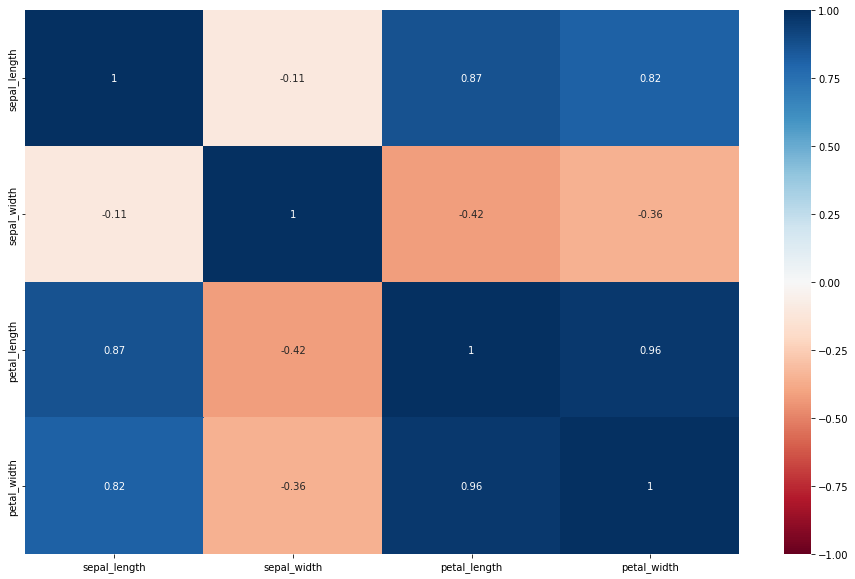

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))

iris_corr = iris_data.corr()
sns.heatmap(iris_corr, annot=True, cmap="RdBu", vmin=-1, vmax=1);

## Ranqueamento

### Gráfico de barras

- Relação entre uma variável categórica e uma métrica numérica

- Barras ordenadas são mais intuitivas

- Não é um histograma

Bar plot no From data to Viz: https://www.data-to-viz.com/graph/barplot.html

Documentação do Plotly: https://plotly.com/python/bar-charts/

Também podemos indicar um intervalo de confiança para o gráfico de barras (barras de erros), porém ainda podem ser [omitidas informações](https://www.data-to-viz.com/caveat/error_bar.html) como ocorre no Boxplot. 

Vamos gerar gráficos de barras para o dataset de medalhas. Primeiro consideramos a soma de todas as medalhas:

In [12]:
medals_wide = px.data.medals_wide()

medals_wide.head()

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [13]:
medals_count = medals_wide.iloc[:,1:].sum(axis=1)
 
bar_count = px.bar(medals_count,
    x=medals_wide["nation"], y=medals_count, error_y=[10] * len(medals_count),
    title="Gráfico de barra simples")
bar_count.show()

Também podemos ter o gráfico de barra empilhado, que pode mostrar os tipos de medalhas que compõe a soma total de medalhas:

In [14]:
bar_stacked = px.bar(medals_wide,
    x="nation", y=["bronze", "silver", "gold"], title="Gráfico de barra empilhado")
bar_stacked.show()

E por fim, o gráfico de barra agrupado:

In [15]:
bar_grouped = px.bar(medals_wide,
    x="nation", y=["bronze", "silver", "gold"],
    title="Gráfico de barra agrupado", barmode="group")
bar_grouped.show()

### Coordenadas paralelas

- Comparação entre múltiplas variáveis

    - Podem ser heterogêneas

- Eixos verticais

- Relações entre variáveis

- Evite *overplotting* ([Spaghetti plot](https://www.data-to-viz.com/caveat/spaghetti.html))

Coordenadas paralelas no From data to Viz: https://www.data-to-viz.com/graph/parallel.html

Documentação do Plotly: https://plotly.com/python/parallel-coordinates-plot/

Para o dataset da `iris` podemos ter o seguinte:

In [16]:
iris = px.data.iris()
iris_data = px.data.iris().drop("species", axis=1)
parallel = px.parallel_coordinates(iris, color="species_id",
    dimensions=['sepal_width', 'sepal_length', 'petal_width', 'petal_length'],
    labels={
        "species_id": "Species",
        "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
        "petal_width": "Petal Width", "petal_length": "Petal Length"},
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2)
parallel.show()

No Plotly Coordenadas paralelas não são implementadas de forma que podemos ver uma legenda de forma discreta com valores categóricos. Bibliotecas como o Altair podem ser uma boa alternativa para lidar com isso:

In [17]:
import altair as alt

iris = px.data.iris()
iris_data = px.data.iris().drop("species_id", axis=1)

alt.Chart(iris_data).transform_window(
    index='count()'
).transform_fold(
    ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=800, height=500)

alt.Chart(...)

### Nuvem de palavras

- Representação da relevância de palavras

    - Cor

    - Tamanho

- Máscaras (formas)

Wordcloud no From data to Viz: https://www.data-to-viz.com/graph/wordcloud.html

Biblioteca para geração de Wordclouds: https://amueller.github.io/word_cloud/

Há implementação mais adequada de Wordcloud para Python é a biblioteca do link anterior. Nela podemos gerar nuvens de palavras até mesmo a partir de imagens. Vamos gerar uma nuvem de palavras baseado em conjunto de dados do vídeo-game Pokémon, onde a imagem usada ('fair use') é uma Pokébola. A cor usada se refere à própria imagem e os nomes dos Pokémons têm o tamanho relativo à soma das estatísticas deles.

890 pokémons usados.


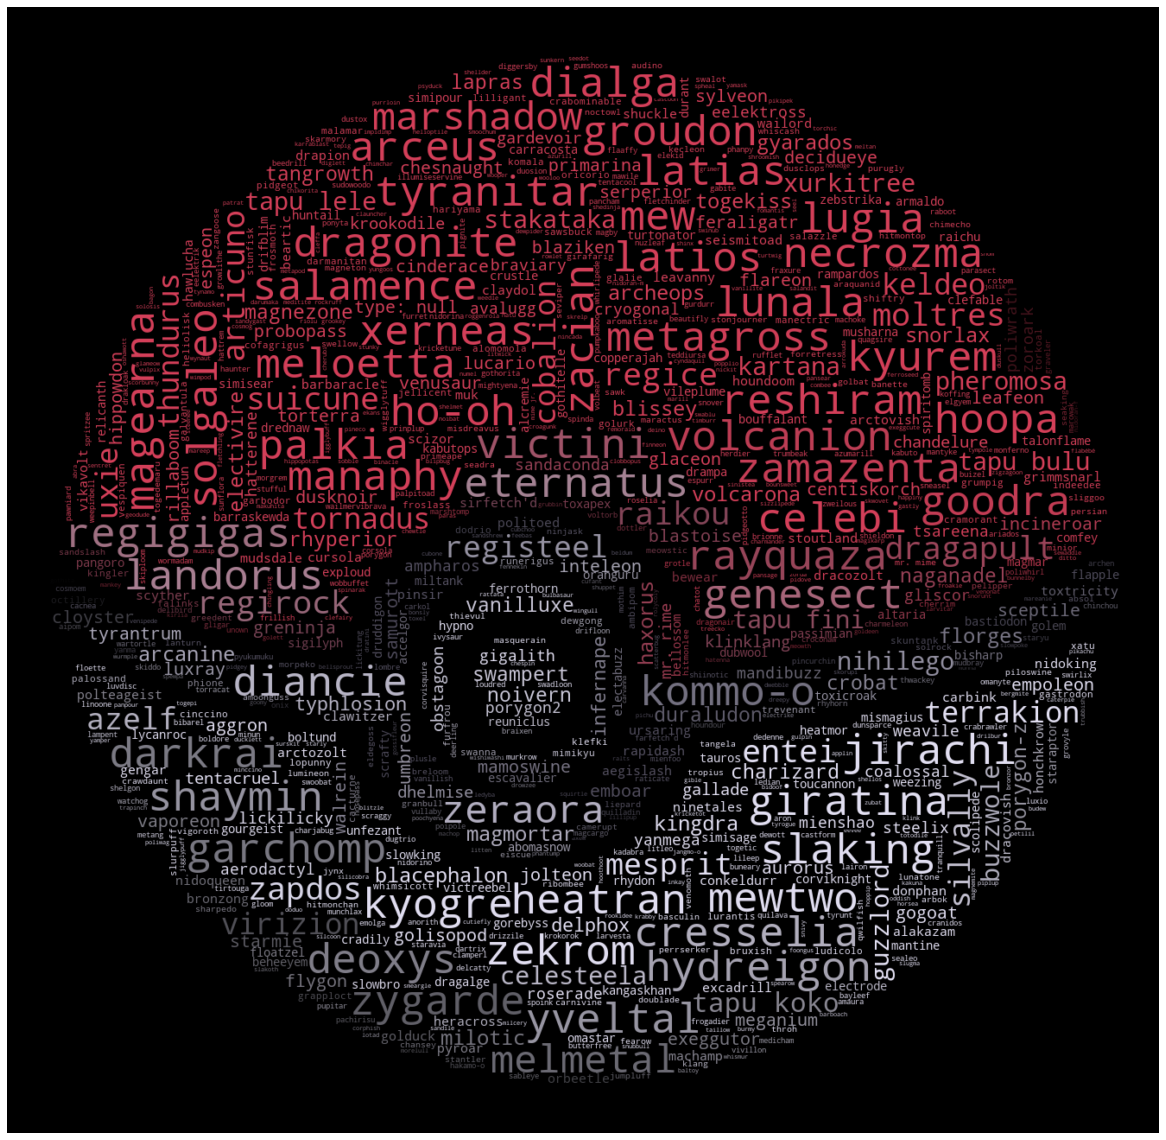

In [18]:
import multidict
import requests
import random

from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO

df = pd.read_csv(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-2/dfPokemon.csv",
)

df = df.drop_duplicates("name")

comment_words = ""

def getFrequencyDictForText():
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # Dicionário para conta frequências
    for val in df.name:
        tmpDict[val.lower()] = df.loc[df["name"] == val].total.item()
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

# Retirado e modificado de https://webstockreview.net/
response = requests.get(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-2/image/pokeball.png",
)
img = Image.open(BytesIO(response.content))

pokeball_color = np.array(img)

pokeball_color = pokeball_color[::3, ::3]

pokeball_mask = pokeball_color.copy()
pokeball_mask[pokeball_mask.sum(axis=2) == 0] = 255

edges = np.mean(
    [
        gaussian_gradient_magnitude(pokeball_color[:, :, i] / 255.0, 2)
        for i in range(3)
    ],
    axis=0,
)
pokeball_mask[edges > 0.08] = 255

wordcloud = WordCloud(
    max_words=2000,
    background_color="black",
    mask=pokeball_mask,
    max_font_size=48,
    relative_scaling=0,
)

pokemonDict = getFrequencyDictForText()

wordcloud.generate_from_frequencies(pokemonDict)

print(str(len(pokemonDict)) + " pokémons usados.")

image_colors = ImageColorGenerator(pokeball_color)

# Gerar a figura
plt.figure(figsize=(16, 16))
plt.imshow(
    wordcloud.recolor(color_func=image_colors), interpolation="bilinear"
)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Para mais detalhes de como fazer uma nuvem de palavras assim, consulte a documentação da biblioteca com [diversos exemplos](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery).

## Parte de Um Todo (Hierarquias)

### Gráfico de setores

- Gráfico de "pizza" (*Pie chart*)

- Representa porções de um todo (%)

    - Soma de todos os setores = 100%

- Não confundir com o *Sunburst* Plot

- A principal desvantagem é a ideia que é difícil para os usuários medirem áreas e ângulos

Pie chart no From data to Viz: https://www.data-to-viz.com/caveat/pie.html

Pie chart no Plotly: https://plotly.com/python/pie-charts/

[What to consider when creating pie charts](https://blog.datawrapper.de/pie-charts/)

Geramos a partir do dataset `tips` um gráfico de setor considerando a variável de dia como setor:

In [19]:
tips = px.data.tips()

pie = px.pie(tips, values='tip', names='day')
pie.show()

### Treemap

- Dados hierárquicos

    - Grupos

    - Retângulos

- Área proporcional ao valor do grupo

- Uso eficiente de espaço

Treemap no From data to Viz: https://www.data-to-viz.com/graph/treemap.html

Treemap no Plotly: https://plotly.com/python/treemaps/

Vamos gerar um treemap baseado no dataset `gapminder`:

In [20]:
gapminder2007 = px.data.gapminder().query("year == 2007")

gapminder2007["world"] = "world" # uma coluna com apenas 'world' no dataset para conter a variável continente
treemap_gapminder2007 = px.treemap(gapminder2007, 
    path=['world', 'continent', 'country'], values='pop',
    color='lifeExp', hover_data=['iso_alpha'],
    color_continuous_scale='RdBu',
    color_continuous_midpoint=np.average(gapminder2007['lifeExp'],
    weights=gapminder2007['pop']))
treemap_gapminder2007.show()

Obs.: O parâmetro "path" descreve para o algoritmo qual é o caminho que a hierarquia de dados deve seguir

### Sunburst plot

- Mistura características do Treemap e do gráfico de setores

- Porém, também herda boa parte de suas desvantagens

Sunburst no From data to Viz: https://www.data-to-viz.com/graph/sunburst.html

Sunburst no Plotly: https://plotly.com/python/sunburst-charts/

Usando o dataset `tips` podemos gerar o seguinde sunburst considerando as variáveis de dia, hora e sexo:


In [21]:
sunburst = px.sunburst(tips,
    path=['day', 'time', 'sex'], values='total_bill')
sunburst.show()

## Evolução

### Gráfico de linhas

- Representa a evolução de uma ou várias variáveis numéricas

- Também utilizado em Scatter plots para representar tendências e padrões (por exemplo, linha de regressão)

- Também sofre do problema de [Spaghetti plot](https://www.data-to-viz.com/caveat/spaghetti.html)

Gráfico de linha no From data to Viz: https://www.data-to-viz.com/graph/line.html

Gráfico de linha no Plotly: https://plotly.com/python/line-charts/

Podemos gerar esse tipo de gráfico para o dataset `stocks`:

In [22]:
stocks = px.data.stocks(indexed=True)

lines = px.line(stocks,
    facet_row="company", facet_row_spacing=0.01)

lines.update_xaxes(visible=False, fixedrange=True)
lines.update_yaxes(visible=False, fixedrange=True)
lines.update_layout(annotations=[], overwrite=True)

lines.show()

### Gráfico de área

- Representa a evolução de conjunto de dados como um todo

- Grupos

    - Proporções relativas

- Valor relativo representado pela largura da "onda" no ponto x

- Alguns problemas que podem existir ao usar esse gráfico são:

    - Empilhamento de áreas pode representar bem a evolução do todo

    - Mas pode levar a interpretações errôneas sobre as partes

Gráfico de área no From data to Viz: https://www.data-to-viz.com/graph/stackedarea.html

Gráfico de área no Plotly: https://plotly.com/python/filled-area-plots/

Problemas: https://www.data-to-viz.com/caveat/stacking.html

Vamos gerar um gráfico de área considerando o dataset `gapminder` visualizando a população dos continentes ao decorrer do anos:

In [23]:
gapminder = px.data.gapminder()

area = px.area(gapminder, 
    x="year", y="pop", color="continent",
	line_group="country")
area.show()

## Geográficos

### Mapas de bolhas

- Representação geográfica de valores numéricos

    - Os valores devem ser codificados na área do círculo, não em seu raio

Mapa de bolhas no From data to Viz: https://www.data-to-viz.com/graph/bubblemap.html

Mapa de bolhas no Plotly: https://plotly.com/python/bubble-maps/

Vamos gerar um gráfico desse para o dataset `gapminder` considerando o crescimento populacional ao decorrer nos anos em países:

In [24]:
gapminder = px.data.gapminder()

bubble = px.scatter_geo(gapminder, locations="iso_alpha", color="continent",
    hover_name="country", size="pop",
    animation_frame="year",
    projection="natural earth")

bubble.update_layout(
    margin=dict(l=10, r=10, t=10, b=10))
bubble.show()

### Mapas de Choropleth

- Uma espécie de mapa de calor representado em dados geográficos

- Os dados devem estar normalizados se considerado um contexto de mais de uma variável envolvida

- Regiões com áreas maiores tendem a tirar a atenção de outras menores

Mapa de Choropleth no From data to Viz: https://www.data-to-viz.com/graph/choropleth.html

Mapa de Choropleth no Plotly: https://plotly.com/python/choropleth-maps/

Usando novamente o dataset `gapminder`, considerando a variável de expectativa de vida, temos o seguinte:

In [25]:
gapminder = px.data.gapminder()

gapminder2007 = gapminder.query("year==2007")
choropleth = px.choropleth(gapminder2007, locations="iso_alpha",
    color="lifeExp",
    hover_name="country",
    color_continuous_scale=px.colors.colorbrewer.Blues)
choropleth.show()

## Fluxos

### Diagramas de rede

- Os diagramas de rede (também chamados de grafos) mostram as interconexões entre um conjunto de entidades

- Cada entidade é representada por um nó (ou vértice)

- As interconexões entre nós são representadas através de links (ou arestas).

- *Hairball* é a principal ressalva na hora de gerar redes: quando muitas conexões e nenhum padrão óbvio são representados, a figura fica desordenada e ilegível

Diagrama de Rede no From data to Viz: https://www.data-to-viz.com/graph/network.html

Biblioteca para diagramas de rede: https://networkx.org/

Vamos gerar um diagrama de rede a partir de dados arbitrários como exemplo:

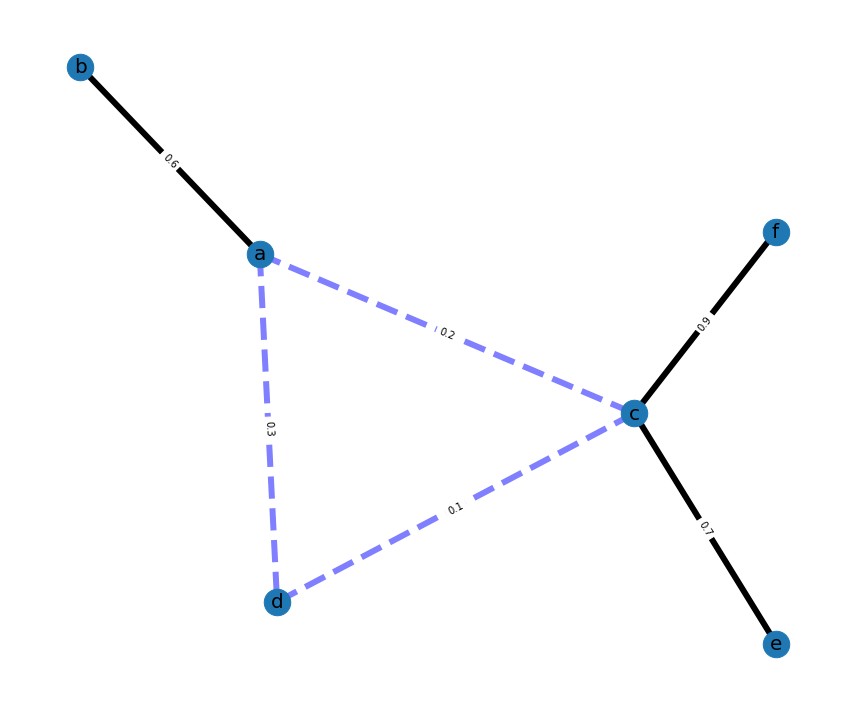

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # posição de todos os nós - seed para reprodutibilidade

plt.figure(figsize=(12, 10))

# nós
nx.draw_networkx_nodes(G, pos, node_size=700)

# arestas
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# rótulos dos nós
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# peso das arestas
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.axis("off")
plt.tight_layout()

### Diagrama de Sankey

- Também conhecido como "Diagrama Aluvial"

    - É uma forma específica de diagrama de Sankey

- Entidades são representadas por retângulos

- Fluxos são representados por arestas entre entidades

- Representa a evolução de dados e a interação entre entidades

Diagrama de Sankey no From data to Viz: https://www.data-to-viz.com/graph/sankey.html

Diagrama de Sankey no Plotly: https://plotly.com/python/sankey-diagram/

Usando o conjunto de dados de [Mike Bostock](https://bost.ocks.org/mike/sankey/), temos:

In [27]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

Note que foi usado o módulo [Graph Object do Plotly](https://plotly.com/python/graph-objects/).